In [1]:
import numpy as np
import pandas as pd

# preprocessing 
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # bags of words and TF IDF

#split dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold # For stratified splitting (helpful in imbalanced data)
from sklearn.preprocessing import MultiLabelBinarizer 

# analyze result
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix , make_scorer
# cnn
from keras.layers import Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:

# Exploratory analysis of data
data=pd.read_csv("file_dataAug.csv",encoding='unicode_escape') # Augmented data 
data.head()

,Unnamed: 0,Sentence,Sentiment
0,0,The GeoSolutions technology will leverage Bene...,0
1,1,"For the last quarter of 2010 , Componenta 's n...",0
2,2,According to the Finnish-Russian Chamber of Co...,0
3,3,The Swedish buyout firm has sold its remaining...,0
4,4,$SPY wouldn't be surprised to see a green close,0


In [3]:

data.drop(columns=['Unnamed: 0'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   10136 non-null  object
 1   Sentiment  10136 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 158.5+ KB


In [4]:
data=data.drop_duplicates()
data.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10071 entries, 0 to 10135
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   10071 non-null  object
 1   Sentiment  10071 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 236.0+ KB


<AxesSubplot:>

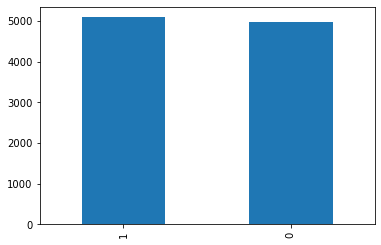

In [5]:
data.Sentiment.value_counts().plot.bar()

In [6]:
# Data preprocessing

# with removal of stopwords

stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text_tokenize = re.split('\W+', text)
    text_nostop = [word for word in text_tokenize if word not in stopwords]
    #text_stemm = [ps.stem(x) for x in text_nostop]
    text_lemm = [wn.lemmatize(x) for x in text_nostop]
    return text_lemm

def clean_text_nostop(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text_tokenize = re.split('\W+', text)
    text_lemm = [wn.lemmatize(x) for x in text_tokenize]
    return text_lemm    

data['text_clean'] = data['Sentence'].apply(lambda x: clean_text(x.lower()))
data['text_clean_nostop'] = data['Sentence'].apply(lambda x: clean_text_nostop(x.lower()))
data.head()

,Sentence,Sentiment,text_clean,text_clean_nostop
0,The GeoSolutions technology will leverage Bene...,0,"[geosolutions, technology, leverage, benefon, ...","[the, geosolutions, technology, will, leverage..."
1,"For the last quarter of 2010 , Componenta 's n...",0,"[last, quarter, 2010, componenta, net, sale, d...","[for, the, last, quarter, of, 2010, componenta..."
2,According to the Finnish-Russian Chamber of Co...,0,"[according, finnishrussian, chamber, commerce,...","[according, to, the, finnishrussian, chamber, ..."
3,The Swedish buyout firm has sold its remaining...,0,"[swedish, buyout, firm, sold, remaining, 224, ...","[the, swedish, buyout, firm, ha, sold, it, rem..."
4,$SPY wouldn't be surprised to see a green close,0,"[spy, wouldnt, surprised, see, green, close]","[spy, wouldnt, be, surprised, to, see, a, gree..."


In [7]:

#one hot encoding of label for cnn
y_ohe = pd.get_dummies(data['Sentiment'])
y=data['Sentiment']

In [8]:
## LSTM
## CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['Sentence'])
print(X_counts.shape)
#print(count_vect.get_feature_names())
print(count_vect.get_feature_names_out())
     

(10071, 15969)
['' '0' '00' ... 'Âºo' 'Â¼' 'Ã']


In [9]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,,0,00,000,000063,0008,001,002,0025,003,...,zona,zone,zoo,zu,Â,Â³,Â³EUR,Âºo,Â¼,Ã
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10068,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10069,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = X_counts_df
X.shape,y_ohe.shape

((10071, 15969), (10071, 2))

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.10, stratify=y_ohe,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2, random_state=42,
                                                  stratify=y_train)

In [12]:
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
validation_x = np.asarray(X_val)
validation_y = np.asarray(y_val)
train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
validation_x = validation_x.reshape((validation_x.shape[0],1,validation_x.shape[1]))
train_x.shape, validation_x.shape,train_y.shape

((7250, 1, 15969), (1813, 1, 15969), (7250, 2))

In [13]:
from math import floor

from keras.models import Sequential
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.layers import Dense, LSTM, Embedding, SimpleRNN,Dropout, BatchNormalization, MaxPooling2D, LeakyReLU

from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from tensorflow import keras

score_acc = make_scorer(accuracy_score)
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings("ignore", category=Warning) 
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option("display.max_columns", None)



In [14]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(1,train_x.shape[2])))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
     

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               9672000   
_________________________________________________________________
batch_normalization (BatchNo (None, 150)               600       
_________________________________________________________________
dense (Dense)                (None, 100)               15100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6

In [15]:

history1=model.fit(train_x,train_y,batch_size=32, epochs=10,verbose=2,validation_data=(validation_x, validation_y ))

Epoch 1/10
227/227 - 16s - loss: 0.4957 - accuracy: 0.7539 - val_loss: 0.5575 - val_accuracy: 0.8456
Epoch 2/10
227/227 - 17s - loss: 0.2462 - accuracy: 0.9061 - val_loss: 0.3408 - val_accuracy: 0.8897
Epoch 3/10
227/227 - 18s - loss: 0.1760 - accuracy: 0.9326 - val_loss: 0.2913 - val_accuracy: 0.8858
Epoch 4/10
227/227 - 18s - loss: 0.1540 - accuracy: 0.9383 - val_loss: 0.3671 - val_accuracy: 0.8748
Epoch 5/10
227/227 - 19s - loss: 0.1318 - accuracy: 0.9457 - val_loss: 0.4552 - val_accuracy: 0.8715
Epoch 6/10
227/227 - 18s - loss: 0.1322 - accuracy: 0.9425 - val_loss: 0.4604 - val_accuracy: 0.8687
Epoch 7/10
227/227 - 18s - loss: 0.1246 - accuracy: 0.9469 - val_loss: 0.4658 - val_accuracy: 0.8687
Epoch 8/10
227/227 - 16s - loss: 0.1056 - accuracy: 0.9510 - val_loss: 0.5599 - val_accuracy: 0.8709
Epoch 9/10
227/227 - 18s - loss: 0.1080 - accuracy: 0.9506 - val_loss: 0.5912 - val_accuracy: 0.8676
Epoch 10/10
227/227 - 17s - loss: 0.1101 - accuracy: 0.9487 - val_loss: 0.5520 - val_accura

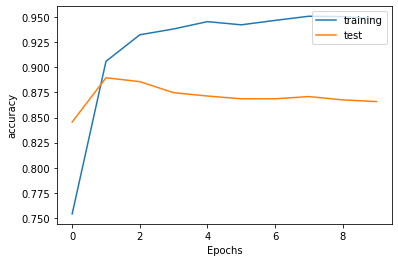

In [16]:
import matplotlib.pyplot as plt
metrics='accuracy'
plt.plot(history1.history[metrics])
plt.plot(history1.history['val_'+ metrics])
plt.xlabel('Epochs')
plt.ylabel(metrics)
plt.legend(['training', 'test'], loc='upper right')
plt.show()

In [17]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score,precision_score

y_pred = model.predict(validation_x)
test_pred=np.argmax(y_pred,axis=1)
validation_y1=np.argmax(validation_y,axis=1)
score=recall_score(test_pred,validation_y1)

print(score)


0.8383534136546185


In [18]:
from sklearn.metrics import recall_score,precision_score,accuracy_score

score=recall_score(test_pred,validation_y1)
print(score)
print(precision_score(test_pred,validation_y1))
print(accuracy_score(test_pred,validation_y1))

0.8383534136546185
0.910577971646674
0.8659680088251517


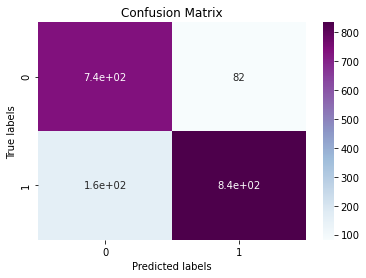

In [19]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix(ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    
plot_conf( test_pred,validation_y1)